In [1]:
import numpy as np
import pandas as pd
import datetime

import pandas_datareader # install with `pip install pandas-datareader`
import pydst # install with `pip install git+https://github.com/elben10/pydst`
import matplotlib.pyplot as plt

In [2]:
Dst = pydst.Dst(lang='en')

In [3]:
print(type(Dst))

<class 'pydst.pydst.Dst'>


**Fetching emplyment data**

In [4]:
Dst.get_subjects()

,id,desc,active,hasSubjects
0,1,People,True,True
1,2,Labour and income,True,True
2,3,Economy,True,True
3,4,Social conditions,True,True
4,5,Education and research,True,True
5,6,Business,True,True
6,7,Transport,True,True
7,8,Culture and leisure,True,True
8,9,Environment and energy,True,True
9,19,Other,True,True


In [5]:
tables = Dst.get_tables(subjects=['2'])
print(type(tables))
display(tables)

<class 'pandas.core.frame.DataFrame'>


,id,text,unit,updated,firstPeriod,latestPeriod,active,variables
0,AKU100K,Seasonally adjusted labour force status,"1,000 people",2022-03-09 08:00:00,2008Q1,2021Q4,True,"[employment status, time]"
1,AKU101K,Seasonally adjusted labour force status in per...,Per cent,2022-03-09 08:00:00,2008Q1,2021Q4,True,"[employment status, time]"
2,AKU110K,Labour force status,"1,000 people",2022-03-09 08:00:00,2008Q1,2021Q4,True,"[employment status, age, sex, time]"
3,AKU111K,Labour force status in percentage,Per cent,2022-03-09 08:00:00,2008Q1,2021Q4,True,"[employment status, age, sex, time]"
4,AKU120K,Labour force status,"1,000 people",2022-03-09 08:00:00,2008Q1,2021Q4,True,"[employment status, region, time]"
...,...,...,...,...,...,...,...,...
233,PENFOR11,Value of pension schemes,-,2021-08-25 08:00:00,2015,2020,True,"[kind of pension, taxation, age, sex, unit, time]"
234,PENFOR12,Value of pension schemes,Number,2021-08-25 08:00:00,2015,2020,True,"[family type, age, sex, price unit, value of p..."
235,PENS6,Value of pension schemes (except special schem...,-,2021-08-25 08:00:00,2015,2020,True,"[kind of pension, company type, unit, family t..."
236,PENFOR20,Value of pension schemes,-,2021-08-27 08:00:00,2015,2020,True,"[kind of pension, company type, age, populatio..."


In [6]:
# We select the following table

tables[tables.id == 'AKU101K']

,id,text,unit,updated,firstPeriod,latestPeriod,active,variables
1,AKU101K,Seasonally adjusted labour force status in per...,Per cent,2022-03-09 08:00:00,2008Q1,2021Q4,True,"[employment status, time]"


In [7]:
indk_vars = Dst.get_variables(table_id='AKU101K')
indk_vars

,id,text,elimination,time,values
0,BESKSTATUS,employment status,False,False,"[{'id': 'BFK', 'text': 'Employment rate'}, {'i..."
1,Tid,time,False,True,"[{'id': '2008K1', 'text': '2008Q1'}, {'id': '2..."


In [8]:
for id in ['BESKSTATUS']:
    print(id)
    values = indk_vars.loc[indk_vars.id == id,['values']].values[0,0]
    for value in values:      
        print(f' id = {value["id"]}, text = {value["text"]}')

BESKSTATUS
 id = BFK, text = Employment rate
 id = LPCT, text = ILO-unemployment rate
 id = EFK, text = Economic activity rate


In [9]:
variables = {'BESKSTATUS':['BFK'],'Tid':['*']}
empl = Dst.get_data(table_id = 'AKU101K', variables=variables)
empl.sort_values(by=['TID'], inplace=True)
empl.head(5)

,BESKSTATUS,TID,INDHOLD
0,Employment rate,2008Q1,76.7
1,Employment rate,2008Q2,76.3
2,Employment rate,2008Q3,76.2
3,Employment rate,2008Q4,76.0
4,Employment rate,2009Q1,75.1


In [10]:
# Code for setting 'TID' as index
# empl.set_index('TID', inplace=True)

<AxesSubplot:xlabel='Time', ylabel='Employment rate'>

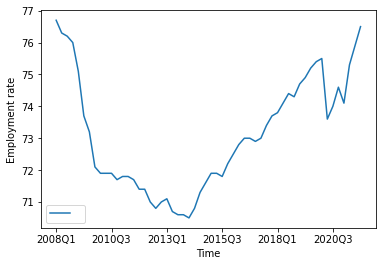

In [11]:
# Plot of employment, quarterly

empl.plot(x = 'TID', y = 'INDHOLD', kind = 'line', ylabel = "Employment rate", xlabel = "Time", label = " ")


**Fetching stock market index data**

In [12]:
tables = Dst.get_tables(subjects=['3'])
print(type(tables))
display(tables)

<class 'pandas.core.frame.DataFrame'>


,id,text,unit,updated,firstPeriod,latestPeriod,active,variables
0,NAN1,Demand and supply,-,2022-03-31 08:00:00,1966,2021,True,"[transaction, price unit, time]"
1,VNAN1,Versionstable NAN1 - Demand and supply (year),-,2022-03-31 08:00:00,1966,2021,True,"[version, transaction, price unit, time]"
2,NAN2,Real gross national disposable income etc.,M dkk,2022-03-31 08:00:00,1966,2021,True,"[transaction, price unit, time]"
3,NAN3,"Consumption, disposable income and saving for ...",-,2022-03-31 08:00:00,1995,2021,True,"[transaction, price unit, time]"
4,NKN1,Demand and supply,-,2022-03-31 08:00:00,1990Q1,2021Q4,True,"[transaction, price unit, seasonal adjustment,..."
...,...,...,...,...,...,...,...,...
360,DNBSTP,Transactions using Danish issued cards,-,2022-02-15 08:00:00,2016Q1,2021Q4,True,"[type, cardholder, data type, time]"
361,DNBSKK,ATMs and card terminals,Number,2022-02-15 08:00:00,2016Q1,2021Q4,True,"[devices, time]"
362,DNBSHI,Withdrawals and deposits,-,2022-02-15 08:00:00,2016Q1,2021Q4,True,"[withdrawels and deposits, point of operation,..."
363,DNBSVKO,Credit transfers in currency,Number,2022-02-15 08:00:00,2016Q1,2021Q4,True,"[type, direction, geographical coverage, data ..."


In [13]:
tables[tables.id == 'MPK13']

,id,text,unit,updated,firstPeriod,latestPeriod,active,variables
354,MPK13,Share index,Index,2022-03-25 08:00:00,1996M01,2022M02,True,"[type, time]"


In [14]:
indk_vars1 = Dst.get_variables(table_id='MPK13')
indk_vars1

,id,text,elimination,time,values
0,TYPE,type,True,False,"[{'id': '10', 'text': 'Total (OMXC end Decembe..."
1,Tid,time,False,True,"[{'id': '1996M01', 'text': '1996M01'}, {'id': ..."


In [15]:
for id in ['TYPE']:
    print(id)
    values = indk_vars1.loc[indk_vars1.id == id,['values']].values[0,0]
    for value in values:      
        print(f' id = {value["id"]}, text = {value["text"]}')

TYPE
 id = 10, text = Total (OMXC end December 1995 = 100)
 id = 57, text = OMXC 20 Cap (28th November 2011 = 400)
 id = 60, text = OMXC 20 (3rd july 1989 = 100)
 id = 75, text = MidCap+ (end December 2002 = 100)
 id = 80, text = SmallCap+  (end December 2002 = 100)
 id = 85, text = OMXC 25 (19th dec 2016 = 1.000)
 id = 13, text = Energy
 id = 15, text = Materials
 id = 20, text = Industrials
 id = 25, text = Consumer discretions
 id = 30, text = Consumer Services
 id = 35, text = Health Care
 id = 40, text = Financials
 id = 45, text = Information technology
 id = 55, text = Utilities


In [16]:
variables1 = {'TYPE':['85'],'Tid':['*']}
stock = Dst.get_data(table_id = 'MPK13', variables=variables1)
stock.sort_values(by=['TID'], inplace=True)
stock.head(5)

,TYPE,TID,INDHOLD
0,OMXC 25 (19th dec 2016 = 1.000),1996M01,..
1,OMXC 25 (19th dec 2016 = 1.000),1996M02,..
2,OMXC 25 (19th dec 2016 = 1.000),1996M03,..
3,OMXC 25 (19th dec 2016 = 1.000),1996M04,..
4,OMXC 25 (19th dec 2016 = 1.000),1996M05,..


In [17]:
# Code for setting 'TID' as index
# stock.set_index('TID', inplace=True)

In [18]:
print(stock.INDHOLD == '..')

0       True
1       True
2       True
3       True
4       True
       ...  
309    False
310    False
311    False
312    False
313    False
Name: INDHOLD, Length: 314, dtype: bool


In [19]:
# Dropping empty rows

stock = stock[stock.INDHOLD != '..']

stock.head(5)

,TYPE,TID,INDHOLD
251,OMXC 25 (19th dec 2016 = 1.000),2016M12,1016
252,OMXC 25 (19th dec 2016 = 1.000),2017M01,1050
253,OMXC 25 (19th dec 2016 = 1.000),2017M02,1060
254,OMXC 25 (19th dec 2016 = 1.000),2017M03,1075
255,OMXC 25 (19th dec 2016 = 1.000),2017M04,1126


In [20]:
print(stock.dtypes)

TYPE       object
TID        object
INDHOLD    object
dtype: object


In [21]:
# Changing 'Indhold' to numeric values

stock['INDHOLD'] = pd.to_numeric(stock['INDHOLD'])

print(stock.dtypes)

TYPE       object
TID        object
INDHOLD     int64
dtype: object


In [22]:
stock['TID'] = stock['TID'].str.replace('M03','Q1')
stock['TID'] = stock['TID'].str.replace('M06','Q2')
stock['TID'] = stock['TID'].str.replace('M09','Q3')
stock['TID'] = stock['TID'].str.replace('M12','Q4')

stock.head(10)

,TYPE,TID,INDHOLD
251,OMXC 25 (19th dec 2016 = 1.000),2016Q4,1016
252,OMXC 25 (19th dec 2016 = 1.000),2017M01,1050
253,OMXC 25 (19th dec 2016 = 1.000),2017M02,1060
254,OMXC 25 (19th dec 2016 = 1.000),2017Q1,1075
255,OMXC 25 (19th dec 2016 = 1.000),2017M04,1126
256,OMXC 25 (19th dec 2016 = 1.000),2017M05,1150
257,OMXC 25 (19th dec 2016 = 1.000),2017Q2,1143
258,OMXC 25 (19th dec 2016 = 1.000),2017M07,1169
259,OMXC 25 (19th dec 2016 = 1.000),2017M08,1172
260,OMXC 25 (19th dec 2016 = 1.000),2017Q3,1174


In [23]:
# Dropping rows in TID that contain 'M'

stock = stock[stock['TID'].str.contains('M')==False]

# Resetting index

stock = stock.reset_index(drop=True)
stock.head(5)

,TYPE,TID,INDHOLD
0,OMXC 25 (19th dec 2016 = 1.000),2016Q4,1016
1,OMXC 25 (19th dec 2016 = 1.000),2017Q1,1075
2,OMXC 25 (19th dec 2016 = 1.000),2017Q2,1143
3,OMXC 25 (19th dec 2016 = 1.000),2017Q3,1174
4,OMXC 25 (19th dec 2016 = 1.000),2017Q4,1146


<AxesSubplot:xlabel='Time', ylabel='Stock price'>

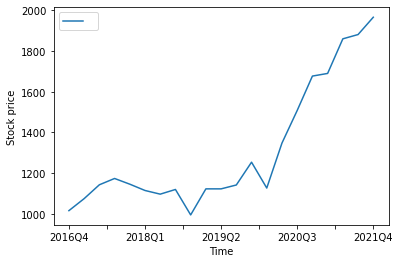

In [24]:
# Plot of closing values, monthly

stock.plot(x = 'TID', y = 'INDHOLD', kind = 'line', ylabel = "Stock price", xlabel = "Time", label =" ")

**Merging data**

In [25]:
complete = pd.merge(empl,stock,on=['TID'],how='outer')
complete.tail(5)

,BESKSTATUS,TID,INDHOLD_x,TYPE,INDHOLD_y
51,Employment rate,2020Q4,74.6,OMXC 25 (19th dec 2016 = 1.000),1677.0
52,Employment rate,2021Q1,74.1,OMXC 25 (19th dec 2016 = 1.000),1690.0
53,Employment rate,2021Q2,75.3,OMXC 25 (19th dec 2016 = 1.000),1860.0
54,Employment rate,2021Q3,75.9,OMXC 25 (19th dec 2016 = 1.000),1881.0
55,Employment rate,2021Q4,76.5,OMXC 25 (19th dec 2016 = 1.000),1966.0


In [26]:
# Renaming variables

complete.rename(columns = {'INDHOLD_x':'Employment', 'INDHOLD_y':'Stockmarket'}, inplace = True)
complete.tail(5)

,BESKSTATUS,TID,Employment,TYPE,Stockmarket
51,Employment rate,2020Q4,74.6,OMXC 25 (19th dec 2016 = 1.000),1677.0
52,Employment rate,2021Q1,74.1,OMXC 25 (19th dec 2016 = 1.000),1690.0
53,Employment rate,2021Q2,75.3,OMXC 25 (19th dec 2016 = 1.000),1860.0
54,Employment rate,2021Q3,75.9,OMXC 25 (19th dec 2016 = 1.000),1881.0
55,Employment rate,2021Q4,76.5,OMXC 25 (19th dec 2016 = 1.000),1966.0


In [27]:
complete['dEmp'] = complete['Employment']/complete['Employment'].shift(1) - 1
complete['dStock'] = complete['Stockmarket']/complete['Stockmarket'].shift(1) - 1
complete.tail(5)

,BESKSTATUS,TID,Employment,TYPE,Stockmarket,dEmp,dStock
51,Employment rate,2020Q4,74.6,OMXC 25 (19th dec 2016 = 1.000),1677.0,0.008108,0.112069
52,Employment rate,2021Q1,74.1,OMXC 25 (19th dec 2016 = 1.000),1690.0,-0.006702,0.007752
53,Employment rate,2021Q2,75.3,OMXC 25 (19th dec 2016 = 1.000),1860.0,0.016194,0.100592
54,Employment rate,2021Q3,75.9,OMXC 25 (19th dec 2016 = 1.000),1881.0,0.007968,0.011290
55,Employment rate,2021Q4,76.5,OMXC 25 (19th dec 2016 = 1.000),1966.0,0.007905,0.045189


<AxesSubplot:xlabel='dEmp', ylabel='dStock'>

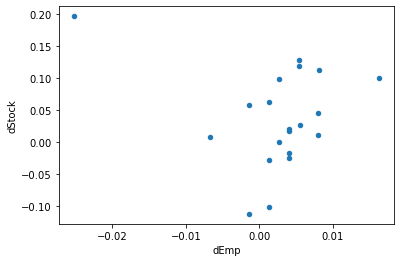

In [48]:
# Correlation plot of change in employment and change in stock market index

complete.plot(x = 'dEmp', y = 'dStock', kind = 'scatter')
#Seems to be a largely positive correlation with one outlier?

# New stuff

In [29]:
gdp_data = pd.read_csv("SNA_TABLE1_17042022034132194.csv")

#Cleaning and dropping data which is not needed

gdp_data = gdp_data[gdp_data['LOCATION'].str.contains('BRIICS') == False]
gdp_data = gdp_data[gdp_data['LOCATION'].str.contains('EU27_2020') == False]
gdp_data = gdp_data[gdp_data['LOCATION'].str.contains('EA19') == False]
gdp_data = gdp_data[gdp_data['LOCATION'].str.contains('OECD') == False]
gdp_data = gdp_data[gdp_data['LOCATION'].str.contains('G-7') == False]

gdp_data = gdp_data.reset_index(drop=True)

pd.set_option('display.max_rows', 10)

gdp_data = gdp_data[gdp_data.Year >= 1996]
gdp_data = gdp_data[gdp_data.Year <= 2016]
gdp_data

,LOCATION,Country,TRANSACT,Transaction,MEASURE,Measure,TIME,Year,Unit Code,Unit,PowerCode Code,PowerCode,Reference Period Code,Reference Period,Value,Flag Codes,Flags
0,AUS,Australia,B1_GE,Gross domestic product (expenditure approach),G,Growth rate,1996,1996,PC,Percentage,0,Units,NaN,NaN,3.908291,NaN,NaN
1,AUS,Australia,B1_GE,Gross domestic product (expenditure approach),G,Growth rate,1997,1997,PC,Percentage,0,Units,NaN,NaN,4.614012,NaN,NaN
2,AUS,Australia,B1_GE,Gross domestic product (expenditure approach),G,Growth rate,1998,1998,PC,Percentage,0,Units,NaN,NaN,4.936675,NaN,NaN
3,AUS,Australia,B1_GE,Gross domestic product (expenditure approach),G,Growth rate,1999,1999,PC,Percentage,0,Units,NaN,NaN,3.912428,NaN,NaN
4,AUS,Australia,B1_GE,Gross domestic product (expenditure approach),G,Growth rate,2000,2000,PC,Percentage,0,Units,NaN,NaN,2.038301,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1243,HRV,Croatia,B1_GE,Gross domestic product (expenditure approach),G,Growth rate,2012,2012,PC,Percentage,0,Units,NaN,NaN,-2.275707,NaN,NaN
1244,HRV,Croatia,B1_GE,Gross domestic product (expenditure approach),G,Growth rate,2013,2013,PC,Percentage,0,Units,NaN,NaN,-0.363117,NaN,NaN
1245,HRV,Croatia,B1_GE,Gross domestic product (expenditure approach),G,Growth rate,2014,2014,PC,Percentage,0,Units,NaN,NaN,-0.345947,NaN,NaN
1246,HRV,Croatia,B1_GE,Gross domestic product (expenditure approach),G,Growth rate,2015,2015,PC,Percentage,0,Units,NaN,NaN,2.525688,NaN,NaN


In [30]:
# removing unwanted columns

#gdp_data.drop('Flag Codes' and 'Flags' and 'Reference Period' and 'PowerCode' and 'PowerCode Code' and 'TIME', axis=1, inplace=True)

In [31]:
# data for change in employment level (in percent)

emp_data = pd.read_csv("PDBI_I4_16042022200327428.csv")

emp_data = emp_data[emp_data['SUBJECT'].str.contains('I4_ANA_EMPTO') == True]
emp_data = emp_data[emp_data['LOCATION'].str.contains('EU27_2020') == False]
emp_data = emp_data[emp_data['LOCATION'].str.contains('EA19') == False]
emp_data = emp_data[emp_data['LOCATION'].str.contains('OECD') == False]
emp_data = emp_data[emp_data['LOCATION'].str.contains('G-7') == False]
emp_data = emp_data[emp_data['Activity'].str.contains('Total') == True]

emp_data = emp_data.reset_index(drop=True)

# We only look at observations from 1996 and onwards because that's where our other dataset starts.
emp_data = emp_data[emp_data.Time >= 1996]
emp_data = emp_data[emp_data.Time <= 2016]
emp_data

,LOCATION,Country,SUBJECT,Subject,MEASURE,Measure,ACTIVITY,Activity,TIME,Time,Unit Code,Unit,PowerCode Code,PowerCode,Reference Period Code,Reference Period,Value,Flag Codes,Flags
1,AUS,Australia,I4_ANA_EMPTO,Total employment (number of persons employed),GRW,Annual growth/change,A_U,Total,1996,1996,PC,Percentage,0,Units,NaN,NaN,0.398463,NaN,NaN
2,AUS,Australia,I4_ANA_EMPTO,Total employment (number of persons employed),GRW,Annual growth/change,A_U,Total,1997,1997,PC,Percentage,0,Units,NaN,NaN,1.828934,NaN,NaN
3,AUS,Australia,I4_ANA_EMPTO,Total employment (number of persons employed),GRW,Annual growth/change,A_U,Total,1998,1998,PC,Percentage,0,Units,NaN,NaN,1.461592,NaN,NaN
4,AUS,Australia,I4_ANA_EMPTO,Total employment (number of persons employed),GRW,Annual growth/change,A_U,Total,1999,1999,PC,Percentage,0,Units,NaN,NaN,3.003300,NaN,NaN
5,AUS,Australia,I4_ANA_EMPTO,Total employment (number of persons employed),GRW,Annual growth/change,A_U,Total,2000,2000,PC,Percentage,0,Units,NaN,NaN,1.575063,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
975,IDN,Indonesia,I4_ANA_EMPTO,Total employment (number of persons employed),GRW,Annual growth/change,A_U,Total,2013,2013,PC,Percentage,0,Units,NaN,NaN,0.227727,NaN,NaN
976,IDN,Indonesia,I4_ANA_EMPTO,Total employment (number of persons employed),GRW,Annual growth/change,A_U,Total,2014,2014,PC,Percentage,0,Units,NaN,NaN,1.655672,NaN,NaN
977,IDN,Indonesia,I4_ANA_EMPTO,Total employment (number of persons employed),GRW,Annual growth/change,A_U,Total,2015,2015,PC,Percentage,0,Units,NaN,NaN,0.166777,NaN,NaN
978,IDN,Indonesia,I4_ANA_EMPTO,Total employment (number of persons employed),GRW,Annual growth/change,A_U,Total,2016,2016,PC,Percentage,0,Units,NaN,NaN,3.129071,NaN,NaN


In [32]:
# removing unwanted columns

#emp_data.drop('Flag Codes' and 'Flags' and 'PowerCode' and 'Reference Period' and 'TIME', axis=1, inplace=True)
#emp_data

In [33]:
# Merging our data

#gdp_emp = pd.merge(gdp_data,emp_data,on=['TIME'],how='outer')
#gdp_emp = pd.merge(gdp_data, emp_data, on='Time', how='left')

#gdp_emp

In [34]:
# plot


Looking at the difference in our data:

In [35]:
print(f'Years in emp: {emp_data.TIME.unique()}')
print(f'countries in emp = {len(emp_data.Country.unique())}')
print(f'Years in gdp: {gdp_data.TIME.unique()}')
print(f'countries in gdp = {len(gdp_data.Country.unique())}')

Years in emp: [1996 1997 1998 1999 2000 2001 2002 2003 2004 2005 2006 2007 2008 2009
 2010 2011 2012 2013 2014 2015 2016]
countries in emp = 40
Years in gdp: [1996 1997 1998 1999 2000 2001 2002 2003 2004 2005 2006 2007 2008 2009
 2010 2011 2012 2013 2014 2015 2016]
countries in gdp = 51


In [36]:
diff_y = [y for y in gdp_data.TIME.unique() if y not in emp_data.TIME.unique()] 
print(f'years in gdp_data, but not in emp_data data: {diff_y}')

diff_y = [y for y in emp_data.TIME.unique() if y not in gdp_data.TIME.unique()] 
print(f'years in emp_data, but not in gdp_data data: {diff_y}')

diff_m = [m for m in gdp_data.Country.unique() if m not in emp_data.Country.unique()] 
print(f'countries in gdp data, but not in emp data: {diff_m}')

diff_m = [m for m in emp_data.Country.unique() if m not in gdp_data.Country.unique()] 
print(f'countries in emp data, but not in gdp data: {diff_m}')

years in gdp_data, but not in emp_data data: []
years in emp_data, but not in gdp_data data: []
countries in gdp data, but not in emp data: ["China (People's Republic of)", 'India', 'Russia', 'Turkey', 'Saudi Arabia', 'Argentina', 'Cyprus', 'Bulgaria', 'Romania', 'Malta', 'Croatia']
countries in emp data, but not in gdp data: []


In [37]:
# further cleaning

gdp_data = gdp_data[gdp_data['Country'].str.contains('India') == False]
gdp_data = gdp_data[gdp_data['Country'].str.contains('Russia') == False]
gdp_data = gdp_data[gdp_data['Country'].str.contains('Turkey') == False]
gdp_data = gdp_data[gdp_data['Country'].str.contains('Saudi Arabia') == False]
gdp_data = gdp_data[gdp_data['Country'].str.contains('Argentina') == False]
gdp_data = gdp_data[gdp_data['Country'].str.contains('Cyprus') == False]
gdp_data = gdp_data[gdp_data['Country'].str.contains('Bulgaria') == False]
gdp_data = gdp_data[gdp_data['Country'].str.contains('Romania') == False]
gdp_data = gdp_data[gdp_data['Country'].str.contains('Malta') == False]
gdp_data = gdp_data[gdp_data['Country'].str.contains('Croatia') == False]
gdp_data = gdp_data[gdp_data['LOCATION'].str.contains('CHN') == False]


gdp_data = gdp_data.reset_index(drop=True)

pd.set_option('display.max_rows', 10)
gdp_data


,LOCATION,Country,TRANSACT,Transaction,MEASURE,Measure,TIME,Year,Unit Code,Unit,PowerCode Code,PowerCode,Reference Period Code,Reference Period,Value,Flag Codes,Flags
0,AUS,Australia,B1_GE,Gross domestic product (expenditure approach),G,Growth rate,1996,1996,PC,Percentage,0,Units,NaN,NaN,3.908291,NaN,NaN
1,AUS,Australia,B1_GE,Gross domestic product (expenditure approach),G,Growth rate,1997,1997,PC,Percentage,0,Units,NaN,NaN,4.614012,NaN,NaN
2,AUS,Australia,B1_GE,Gross domestic product (expenditure approach),G,Growth rate,1998,1998,PC,Percentage,0,Units,NaN,NaN,4.936675,NaN,NaN
3,AUS,Australia,B1_GE,Gross domestic product (expenditure approach),G,Growth rate,1999,1999,PC,Percentage,0,Units,NaN,NaN,3.912428,NaN,NaN
4,AUS,Australia,B1_GE,Gross domestic product (expenditure approach),G,Growth rate,2000,2000,PC,Percentage,0,Units,NaN,NaN,2.038301,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
830,CRI,Costa Rica,B1_GE,Gross domestic product (expenditure approach),G,Growth rate,2012,2012,PC,Percentage,0,Units,NaN,NaN,4.882592,NaN,NaN
831,CRI,Costa Rica,B1_GE,Gross domestic product (expenditure approach),G,Growth rate,2013,2013,PC,Percentage,0,Units,NaN,NaN,2.494766,NaN,NaN
832,CRI,Costa Rica,B1_GE,Gross domestic product (expenditure approach),G,Growth rate,2014,2014,PC,Percentage,0,Units,NaN,NaN,3.542110,NaN,NaN
833,CRI,Costa Rica,B1_GE,Gross domestic product (expenditure approach),G,Growth rate,2015,2015,PC,Percentage,0,Units,NaN,NaN,3.652081,NaN,NaN


In [49]:

import plotly.express as px

df = px.data.gapminder()
fig = px.scatter(df, x="gdpPercap", y="lifeExp", animation_frame="year", animation_group="country",
           size="pop", color="continent", hover_name="country",
           log_x=True, size_max=55, range_x=[100,100000], range_y=[25,90])

fig["layout"].pop("updatemenus") # optional, drop animation buttons
fig.show()